In [6]:
# Load dependencies
import pandas as pd

In [7]:
# Load dataset
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum()

Unnamed: 0      0
statement     362
status          0
dtype: int64

In [10]:
# Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
# Convert label to numerical
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [12]:
# Eliminate rows with missing values
df.dropna(subset=['statement'], inplace=True)

In [13]:
# Divide dataset into chararacteristics and labels
X = df['statement']
y = df['status']

In [14]:
# Divide dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import matplotlib.pyplot as plt

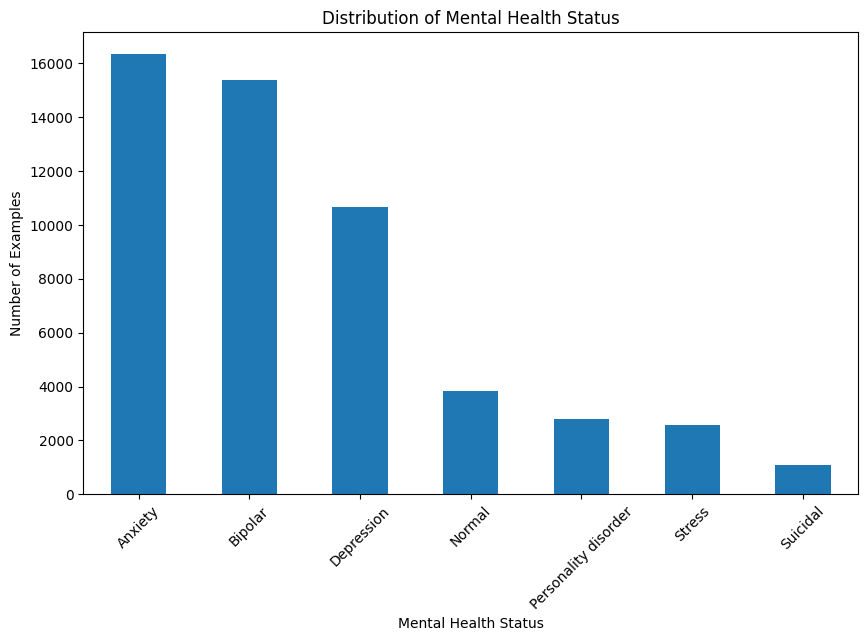

In [16]:
# Plot distribution of mental health status
plt.figure(figsize=(10, 6))
df['status'].value_counts().plot(kind='bar')
plt.title("Distribution of Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Number of Examples")
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Training model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

In [21]:
# Evaluate model
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report
                      precision    recall  f1-score   support

             Anxiety       0.86      0.64      0.74       755
             Bipolar       0.95      0.53      0.68       527
          Depression       0.57      0.78      0.66      3016
              Normal       0.84      0.94      0.89      3308
Personality disorder       0.98      0.34      0.50       237
              Stress       0.94      0.27      0.42       536
            Suicidal       0.69      0.53      0.60      2158

            accuracy                           0.72     10537
           macro avg       0.83      0.58      0.64     10537
        weighted avg       0.75      0.72      0.71     10537



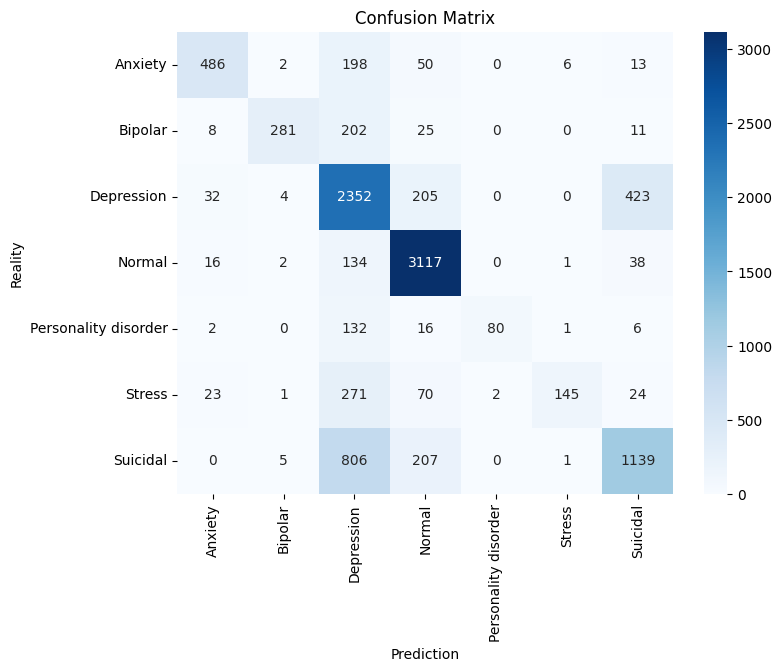

In [22]:
# Confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Reality")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix without visualization
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 486    2  198   50    0    6   13]
 [   8  281  202   25    0    0   11]
 [  32    4 2352  205    0    0  423]
 [  16    2  134 3117    0    1   38]
 [   2    0  132   16   80    1    6]
 [  23    1  271   70    2  145   24]
 [   0    5  806  207    0    1 1139]]


In [39]:
# Make prediction
def predict_mental_health_status(text):
    # Vectorize the input text
    text_vec = vectorizer.transform([text])
    
    # Make the prediction
    prediction = model.predict(text_vec)
    
    # Convert the numerical prediction to the original category
    status = label_encoder.inverse_transform(prediction)
    
    return status[0]


In [40]:
# Example usage
text_1 = "I feel empty and numb. Nothing excites me anymore."
result = predict_mental_health_status(text_1)
print(f"The predicted mental health status for the given text is: {result}")

text_2 = "I am feeling great and excited about the future."
result = predict_mental_health_status(text_2)
print(f"The predicted mental health status for the given text is: {result}")

text_3 = "I am feeling very anxious and stressed about work."
result = predict_mental_health_status(text_3)
print(f"The predicted mental health status for the given text is: {result}")

text_4 = "I don't see a reason to continue living, I just wanna die."
result = predict_mental_health_status(text_4)
print(f"The predicted mental health status for the given text is: {result}")

text_5 = "I act impulsively and regret it later."
result = predict_mental_health_status(text_5)
print(f"The predicted mental health status for the given text is: {result}")

The predicted mental health status for the given text is: Depression
The predicted mental health status for the given text is: Normal
The predicted mental health status for the given text is: Anxiety
The predicted mental health status for the given text is: Suicidal
The predicted mental health status for the given text is: Normal
